) missing from current font.Temp\ipykernel_15080\2253376906.py:29: UserWarning: Glyph 13 (
  plt.tight_layout()
) missing from current font.g\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)


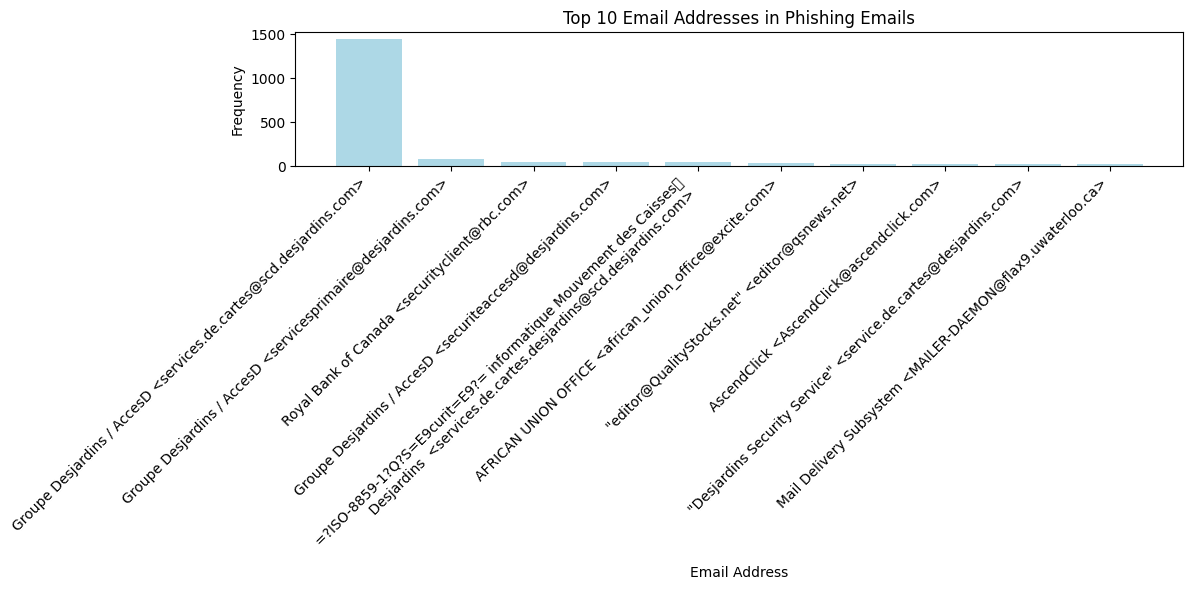

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# อ่านข้อมูลจากไฟล์ CSV
train_data_01 = pd.read_csv('TrainData01.csv')
train_data_02 = pd.read_csv('TrainData02.csv')
test_data = pd.read_csv('TestData.csv')

In [ ]:
# รวมข้อมูลทั้งหมดเข้าด้วยกัน
data = pd.concat([train_data_01, train_data_02, test_data], ignore_index=True)

In [ ]:
# เลือกข้อมูลเฉพาะที่เป็น Phishing (label = 1)
phishing_data = data[data['label'] == 1]

# นับความถี่ของ email_from ที่พบใน Phishing
top_emails = phishing_data['email_from'].value_counts().head(10).reset_index()
top_emails.columns = ['email_from', 'frequency']

# กำหนดให้ Matplotlib ใช้ฟอนต์ DejaVu Sans เพื่อรองรับ Unicode glyphs
plt.rcParams['font.family'] = 'DejaVu Sans'

# วาดกราฟแท่ง (Bar Chart) แสดงความถี่ของอีเมลที่พบบ่อยใน Phishing
plt.figure(figsize=(12, 6))
plt.bar(top_emails['email_from'], top_emails['frequency'], color='lightblue')
plt.title("Top 10 Email Addresses in Phishing Emails")
plt.xlabel("Email Address")
plt.ylabel("Frequency")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# บันทึกผลลัพธ์เป็น CSV
top_emails.to_csv('Top10_Phishing_Emails.csv', index=False)